# Linear Regression Simple NumPy

In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# - NumPy (imported as np) is a fundamental package for numerical computing with Python.
# - sklearn.datasets provides tools for dataset loading and generation.
# - matplotlib.pyplot (imported as plt) is a plotting library for creating static, animated, and interactive visualizations in Python.

## 1. DataSet

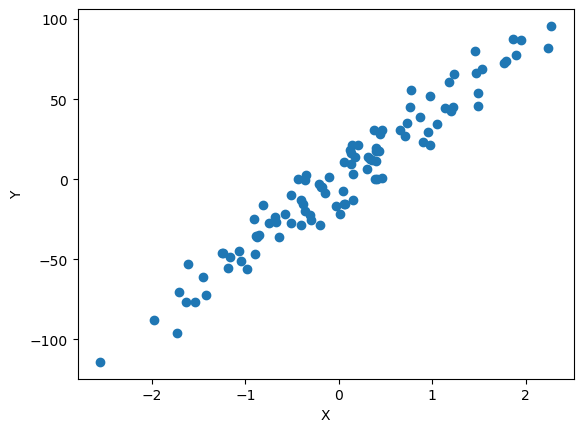

In [15]:
np.random.seed(0)  # Setting the random seed to 0 for reproducibility of the dataset

# Generating synthetic regression data using make_regression function from scikit-learn
# Parameters:
# - n_samples: Number of samples (data points) to generate
# - n_features: Number of features (independent variables) in the dataset
# - noise: Standard deviation of the gaussian noise applied to the output
x, y = make_regression(n_samples=100, n_features=1, noise=10)

# Creating a scatter plot to visualize the generated data
# - x: Independent variable values (abscissa)
# - y: Dependent variable values (ordinate)
plt.scatter(x, y)

# Adding labels to the axes
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the plot
plt.show()

In [16]:
# Printing the shape of the variable x
print(x.shape)

# Printing the shape of the variable y
print(y.shape)

# Reshaping y to have a single column
y = y.reshape(y.shape[0], 1)

# Printing the new shape of y after reshaping
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [17]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [36]:
np.random.seed(0)  # Set the seed for reproducibility

# Generate a random vector theta with shape (2, 1) using a standard normal distribution
# The shape is (2, 1) indicating it's a column vector with 2 rows and 1 column
theta = np.random.randn(2, 1)

# Display the generated random vector theta
theta

array([[1.76405235],
       [0.40015721]])

## 2. Linear Model

In [21]:
def Linear_model(X, theta):
    return X.dot(theta)

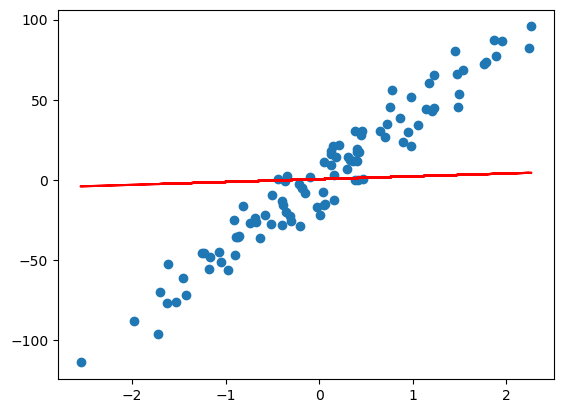

In [37]:
plt.scatter(x, y)
plt.plot(x, Linear_model(X, theta), c='red')

## 3. Cost Function

In [38]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((Linear_model(X, theta) - y)**2)

In [39]:
cost_function(X, y, theta)

905.6306841935502

## 4. Gradient Descent

In [40]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(Linear_model(X, theta) - y)

In [44]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    """
    Perform gradient descent to minimize the cost function.

    Parameters:
    - X: Feature matrix (including the intercept term)
    - y: Target values
    - theta: Initial model parameters
    - learning_rate: Learning rate for gradient descent
    - n_iterations: Number of iterations for gradient descent

    Returns:
    - Optimized model parameters theta
    - Array of cost history (evolution of cost function over iterations)
    """
    cost_history = np.zeros(n_iterations)  # Create an array to store the evolution of the cost function
    
    for i in range(n_iterations):
        # Update theta using gradient descent formula
        theta = theta - learning_rate * grad(X, y, theta)
        
        # Calculate the cost function value and store it in the cost_history array
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

## 5.Train the model

In [46]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [47]:
theta_final

array([[42.61765864],
       [-0.81309274]])

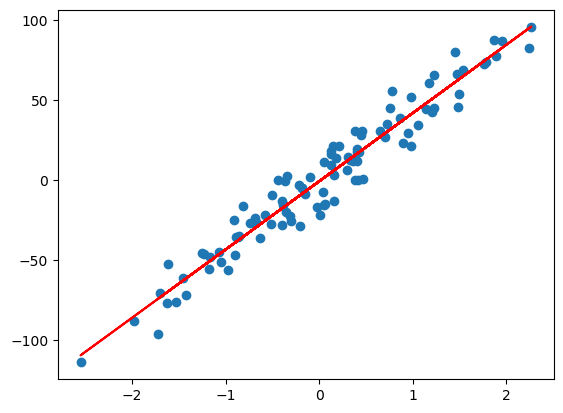

In [48]:
# Create predictions using the trained model and final parameters
predictions = Linear_model(X, theta_final)

# Plot the original dataset (in blue) and the predictions (in red)
plt.scatter(x, y)  # Scatter plot of the original dataset
plt.plot(x, predictions, c='r')  # Plot predictions against the x values

## 6. Learning Curves

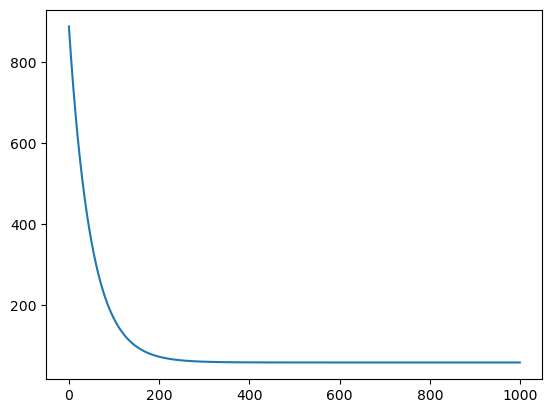

In [50]:
plt.plot(range(n_iterations), cost_history)

## 7. Final evaluation

In [53]:
def coef_determination(y, pred):
    """
    Calculate the coefficient of determination (R^2 score).

    Parameters:
    - y: Array of true values
    - pred: Array of predicted values

    Returns:
    - Coefficient of determination (R^2 score)
    """
    u = ((y - pred)**2).sum()  # Sum of squared residuals (unexplained variance)
    v = ((y - y.mean())**2).sum()  # Total sum of squares (total variance)
    return 1 - u/v  # Coefficient of determination formula

In [54]:
coef_determination(y, predictions)

0.9417294706504984